# Return on Investment (ROI) analysis using Exploratory Data Analysis of IMDB Movie Dataset for Sussex Budget Production

## **Overview of the Report**:

In their most recent film, Sussex Budget Production invested £500K and collected only £100K as their return, which is basically -80% of the return on investment (ROI).

Business Question for this Report:
How can we increase the return on investment while maintaining the company's operations?

In order to answer this question, we must first conduct an analysis that gives us evidence of what type of movies will perform better, given previously that the "comedy-action-thriller" genre was attempted and failed miserably to collect the invested amount in the box office. Now the company is prepared to secure a budget of £1.5 million through the persuasion of investors, where their only proposed option to the investors is to make sure that it must be a good return on investment (ROI) and must be used to keep the business going even though it lost money.

In this report:
I will be performing an exploratory data analysis (EDA) for this report. This analysis will let us organize and clean the data so that we can use the cleaned version of the data file for the analysis. Then I'll be performing a natural hypothesis using the chosen data in order to find proof to help me decide on the next movie production that is statistically significant for the variables we test.

After completing all of the exploratory data analysis and hypothesis tests, I can choose the best next steps to take in order to maximize my return on investment. With this conclusion, I should be able to answer the report's business question.

In [1]:
#we are first importing the required libraries to work on data in this report.
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

## **Data Exploring and Cleaning**:

Once all the necessary libraries have been imported, I will proceed to read the IMDB data, clean the data properly, and conduct exploratory data analysis. This will involve examining the presence of null values, identifying unique values, and removing any unwanted entries, outliers, and duplicate values. So, let us begin with the process of data cleaning.

In [2]:
movie_dataset=pd.read_csv('movie_metadata.csv') #Loading the movie dataset to a dataframe

# Dropping rows where the 'color' column has the value 'Black and White' since they are outliers and don't need to be considered for producing a movie
movie_dataset = movie_dataset[movie_dataset['color'] != 'Black and White'].reset_index(drop=True)
movie_dataset.head()

,color,director_name,critic_Reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [3]:
movie_dataset.info() #Checking all of the basic information associated with our IMDB data file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   color                    4979 non-null   object 
 1   director_name            4895 non-null   object 
 2   critic_Reviews           4949 non-null   float64
 3   duration                 4983 non-null   float64
 4   director_facebook_likes  4895 non-null   float64
 5   actor_3_facebook_likes   4975 non-null   float64
 6   actor_2_name             4985 non-null   object 
 7   actor_1_facebook_likes   4991 non-null   float64
 8   gross                    4124 non-null   float64
 9   genres                   4998 non-null   object 
 10  actor_1_name             4991 non-null   object 
 11  movie_title              4998 non-null   object 
 12  num_voted_users          4998 non-null   int64  
 13  total_FB_Likes           4998 non-null   int64  
 14  actor_3_name            

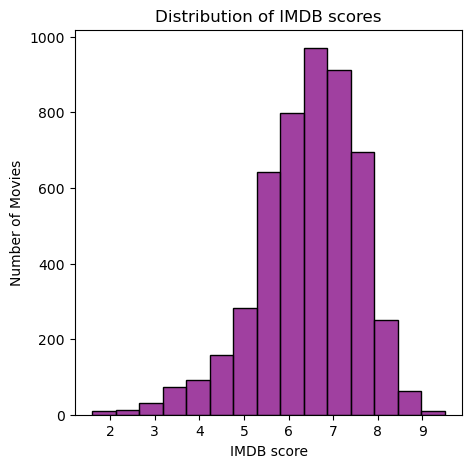

In [4]:
plt.figure(figsize=(5, 5))
#plotting a histogram of IMDb scores from the dataset
sns.histplot(movie_dataset['imdb_score'], bins=15, kde=False, color='purple')
plt.title('Distribution of IMDB scores')
plt.xlabel('IMDB score')
plt.ylabel('Number of Movies')
plt.show()

In [5]:
movie_dataset.genres.unique() #This function will give us the unique genres from the dataset

array(['Action|Adventure|Fantasy|Sci-Fi', 'Action|Adventure|Fantasy',
       'Action|Adventure|Thriller', 'Action|Thriller', 'Documentary',
       'Action|Adventure|Sci-Fi', 'Action|Adventure|Romance',
       'Adventure|Animation|Comedy|Family|Fantasy|Musical|Romance',
       'Adventure|Family|Fantasy|Mystery', 'Action|Adventure',
       'Action|Adventure|Western', 'Action|Adventure|Family|Fantasy',
       'Action|Adventure|Comedy|Family|Fantasy|Sci-Fi',
       'Adventure|Fantasy', 'Action|Adventure|Drama|History',
       'Adventure|Family|Fantasy', 'Action|Adventure|Drama|Romance',
       'Drama|Romance', 'Action|Adventure|Sci-Fi|Thriller',
       'Action|Adventure|Fantasy|Romance',
       'Action|Adventure|Fantasy|Sci-Fi|Thriller',
       'Adventure|Animation|Comedy|Family|Fantasy',
       'Adventure|Animation|Comedy|Family|Sport', 'Action|Crime|Thriller',
       'Action|Adventure|Horror|Sci-Fi|Thriller',
       'Adventure|Animation|Family|Sci-Fi',
       'Action|Comedy|Crime|Thrille

In [6]:
movie_dataset.genres.count() #checking the total count of genres

4998

In [7]:
movie_dataset.genres.nunique() #count of unique genres

914

In [8]:
movie_dataset.duplicated().sum() #To find out the number of duplicate records in the dataset.
#Here we got a total of 45 Duplicate records

0

Number of Null Values before Removal:
color                       19
director_name              103
critic_Reviews              49
duration                    15
director_facebook_likes    103
actor_3_facebook_likes      23
actor_2_name                13
actor_1_facebook_likes       7
gross                      874
genres                       0
actor_1_name                 7
movie_title                  0
num_voted_users              0
total_FB_Likes               0
actor_3_name                23
facenumber_in_poster        13
plot_keywords              152
movie_imdb_link              0
num_user_for_reviews        21
language                    14
country                      5
content_rating             301
budget                     487
title_year                 107
actor_2_facebook_likes      13
imdb_score                   0
aspect_ratio               327
movie_facebook_likes         0
dtype: int64


<Axes: >

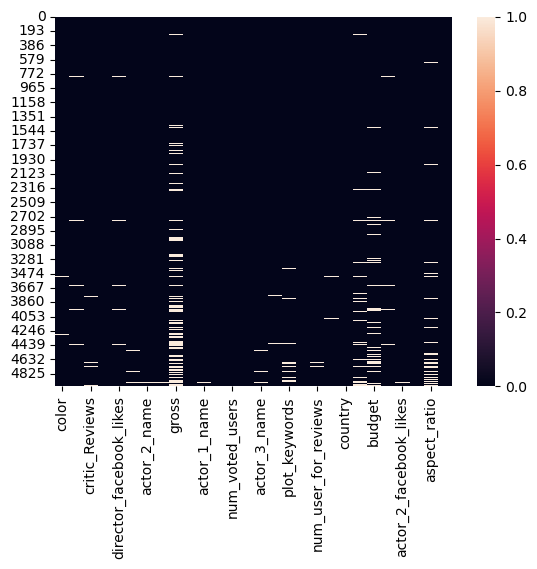

In [9]:
null_values_before_removal = movie_dataset.isnull().sum()
print("Number of Null Values before Removal:")
print(null_values_before_removal) #number of null values before removal will be printed
sns.heatmap(movie_dataset.isnull()) #number of nulls available in this file and can be shown in heatmap

Now the IMDB data has been imported into a "movie_dataset" data frame with 5043 records. Data wrangling revealed null values, 45 duplicate records, and unique movie genres. The heatmap above demonstrates how null values are spread across columns, thus we must clean the data before analysing it.

In the next step, I will eliminate duplicate entries and remove the null values in the dataset to clean the data.

Number of Null Values After Removal:
color                      0
director_name              0
critic_Reviews             0
duration                   0
director_facebook_likes    0
actor_3_facebook_likes     0
actor_2_name               0
actor_1_facebook_likes     0
gross                      0
genres                     0
actor_1_name               0
movie_title                0
num_voted_users            0
total_FB_Likes             0
actor_3_name               0
facenumber_in_poster       0
plot_keywords              0
movie_imdb_link            0
num_user_for_reviews       0
language                   0
country                    0
content_rating             0
budget                     0
title_year                 0
actor_2_facebook_likes     0
imdb_score                 0
aspect_ratio               0
movie_facebook_likes       0
dtype: int64


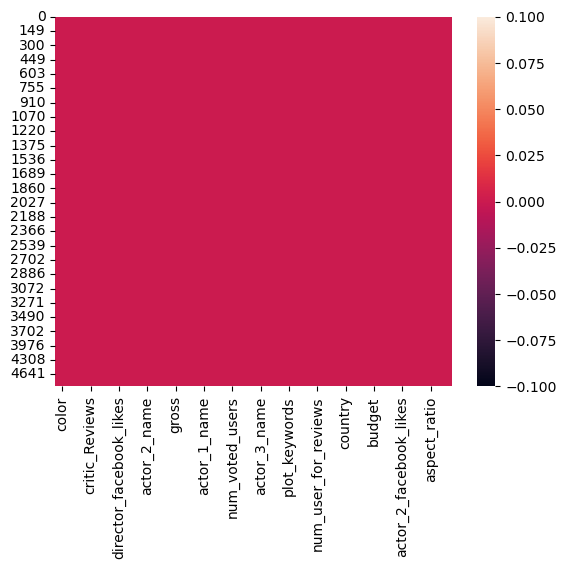

In [10]:
movie_dataset.dropna(inplace= True) #This line of code will drop all the Null values.
# Display the number of null values in each column after removal
null_values_after_removal = movie_dataset.isnull().sum()
print("Number of Null Values After Removal:")
print(null_values_after_removal)

sns.heatmap(movie_dataset.isnull()) #To ensure the null values are dropped and is shown in the below heatmap.
plt.show()

In [11]:
movie_dataset.drop_duplicates(subset=None, inplace= True) #This line will remove/drop the duplicates from the dataset
movie_dataset.duplicated().sum() #Checking for the duplicate value counts once again which should be 0.

0

## **Exploratory Data Analysis**

In [12]:
columns =['budget', 'country', 'director_name', 'genres', 'gross', 'language', 'imdb_score', 'movie_title']
#I only need to extract the above mentioned column datas for my further analysis to check whether which movie genre can be recommended
CFmovie_dataset = movie_dataset[columns] #This is a new data frame name for the file with customized columns

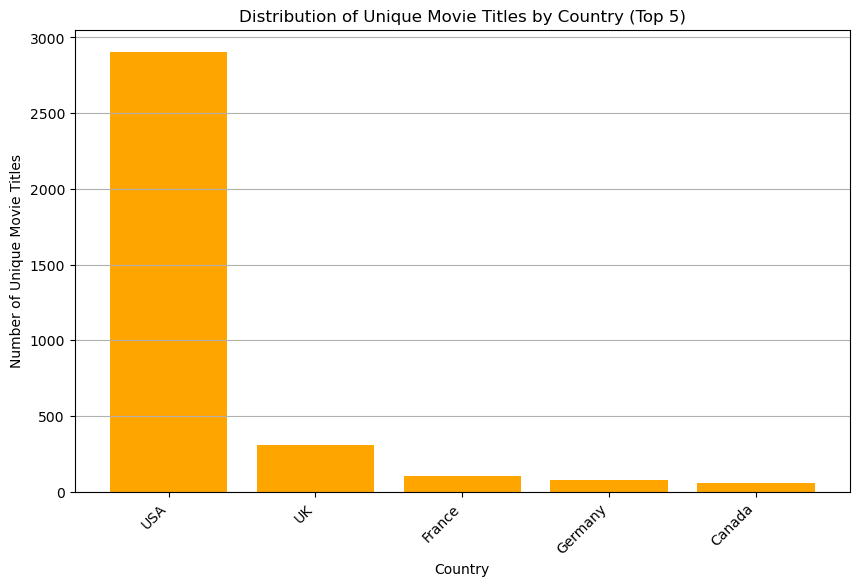

In [13]:
#I'm now gonna plot a histogram in order to display the unique movie titles released in Top 5 countries
df_country = CFmovie_dataset.groupby(['country']).agg({"movie_title": "nunique"}).reset_index().sort_values(by=['movie_title'], ascending=False)[:5]
#Creating a histogram
plt.figure(figsize=(10, 6))
plt.bar(df_country['country'], df_country['movie_title'], color='orange')
plt.xlabel('Country')
plt.ylabel('Number of Unique Movie Titles')
plt.title('Distribution of Unique Movie Titles by Country (Top 5)')
plt.xticks(rotation=45, ha='right')  #Rotate country labels for better readability
plt.grid(axis='y')  #Adding a grid to enhance readability
plt.show()

I have analysed each country's movie production, as seen in the histogram. In this, I plotted the top countries again and found that the US market has the most movies. To target a certain market and get a high ROI, I will refine my analysis, targeting for the US market.

Now I will be appending data quality parameters to the file after deciding which particular columns to include. These factors include the following parameters: 1) Eliminating the zeros from the budget and gross columns since they provide inaccurate insights. 2) Limiting the budget value to 1.5M (Budget≤1,500,000) because we only have a 1.5M budget. 3) I've selected the US as my target market to increase ROI.

In addition to the existing paramaters where budget, gross and imdb_score are metrics (Facts) and genres, director_name, country and language are dimensions. With these paramaters i'll be adding 2 more calculated metrics called Return on Investment %(ROI%) and Profit(based on budget and gross).

In [14]:
CFmovie_dataset = CFmovie_dataset[CFmovie_dataset['budget']<=1500000] #This is to restrict the budget value
CFmovie_dataset = CFmovie_dataset[CFmovie_dataset['budget']!=0]
CFmovie_dataset = CFmovie_dataset[CFmovie_dataset['gross']!=0] #dropping the 0 values from the gross
CFmovie_dataset = CFmovie_dataset[CFmovie_dataset['country']=='USA'] #Keeping the target country market as USA
CFmovie_dataset.dropna(subset=['budget', 'gross', 'country'], inplace=True) #removing/dropping the Null values from the rows

In [15]:
#now calculating and adding the new metric fields to dataframe
CFmovie_dataset["%ReturnOnInvestment"]= ((CFmovie_dataset["gross"]-CFmovie_dataset["budget"])/ CFmovie_dataset["budget"])
CFmovie_dataset["Profit"]= (CFmovie_dataset["gross"]-CFmovie_dataset["budget"])

In [16]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [17]:
from tabulate import tabulate

dataset_genre = CFmovie_dataset.groupby(['genres', ]).agg({"%ReturnOnInvestment":"max","movie_title":"count"}).reset_index().sort_values(by=['%ReturnOnInvestment'],ascending=False)[:15]
#Displaying the top genres and their corresponding max ROI values also with their count of movies in each genre
dataset_genre = dataset_genre.rename(columns={"%ReturnOnInvestment": "%ROI", "movie_title":"total_movies"}) #Renaming the columns to avoid conflicts
top_genres = dataset_genre [['genres','%ROI','total_movies']]
print("Top Genres based on Return on Investment:")
print(tabulate(top_genres, headers='keys', tablefmt='pretty', showindex=False))

Top Genres based on Return on Investment:
+-------------------------------------------+--------------------+--------------+
|                  genres                   |        %ROI        | total_movies |
+-------------------------------------------+--------------------+--------------+
|                  Horror                   | 7193.4855333333335 |      6       |
|           Biography|Documentary           | 2714.6605504587155 |      1       |
|           Comedy|Drama|Romance            |      408.864       |      13      |
|              Horror|Thriller              | 368.4272853517215  |      5       |
|    Action|Crime|Drama|Romance|Thriller    |       290.56       |      1       |
|         Comedy|Documentary|Drama          | 176.3748923076923  |      1       |
|            Comedy|Drama|Music             | 147.00514800514802 |      2       |
|                Drama|Sport                | 121.12004895833333 |      5       |
|                  Comedy                   |     110.35

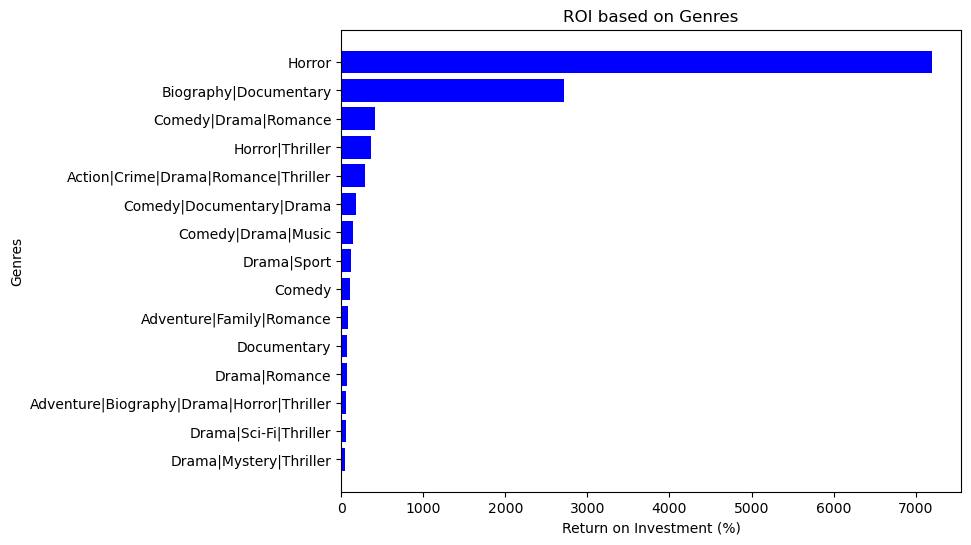

175

In [18]:
#Plotting return on investment based on the Genres
plt.figure(figsize=(8,6))
plt.barh(dataset_genre[::-1]['genres'], dataset_genre[::-1]['%ROI'],color=['blue'])
plt.xlabel('Return on Investment (%)')
plt.ylabel('Genres')
plt.title('ROI based on Genres')
plt.show()
CFmovie_dataset.shape[0] #checking the number of samples/records in the dataframe


The above plot above shows genre-specific maximum ROI and also helps us identify the genres for data analysis using maximum ROI %. Due to the small sample numbers for the top two genres (6 and 1), I have considered to go with the Comedy|Drama|Romance (13) for my further analysis.

In [19]:
CFmovie_dataset = CFmovie_dataset[CFmovie_dataset['genres']=='Comedy|Drama|Romance'] #filtering the genre and keeping only Comedy|Drama|Romance genre by above analysis
CFmovie_dataset.shape[0] #checking the number of samples/records in the dataframe

13

In [20]:
CFmovie_dataset.describe() #showing descriptive statistics

,budget,gross,imdb_score,%ReturnOnInvestment,Profit
count,13.000000,1.300000e+01,13.000000,13.000000,1.300000e+01
mean,466538.461538,3.926704e+06,6.753846,40.648154,3.460165e+06
std,385510.400937,3.715438e+06,0.415563,111.343209,3.807864e+06
min,25000.000000,2.792820e+05,6.100000,-0.720718,-7.207180e+05
25%,225000.000000,9.028350e+05,6.500000,2.611340,6.528350e+05
50%,250000.000000,2.938208e+06,6.700000,6.022940,2.713208e+06
75%,850000.000000,4.186931e+06,7.000000,15.747724,3.936931e+06
max,1000000.000000,1.200651e+07,7.500000,408.864000,1.175651e+07


## **Hypothesis Testing**:

The describe() function will return all calculated values with respect to statistics and this will enable us to conduct hypothesis analysis.

"A high imdb_score will result in a higher Return on Investment (ROI) for Comedy, Drama, and Romance if imdb_score has an impact on this measure."

On this natural hypothesis, we have two variables: imdb_score (independent variable) and return on investment.

H0, Null Hypothesis: imdb_score has no influence on the Return on Investment for Comedy|Drama|Romance. H0: Assumed mean μ=6.5

H1 Alternative Hypothesis: imdb_score has an effect on Comedy|Drama|Romance Return on Investment. Assumed mean μ≥6.5

N=13 X(sample mean)=6.75 standard deviation=0.41

In [21]:
#Calculating the t-value or t-score using the above values since the sample size is < 30
import math

sample_mean = 6.75
population_mean_null_hypothesis = 6.5
standard_deviation = 0.41
sample_size = 13

# Calculate t-value
t_value = (sample_mean - population_mean_null_hypothesis) / (standard_deviation / math.sqrt(sample_size))

print("t-value:", t_value)

t-value: 2.1985068752829204


Using the T value above i.e T ≥ 2.198 we can calculate the p-value based on the T value

In [22]:
#Hypothesis testing for finding the p value
from scipy import stats
p_value = 1-stats.norm.cdf(2.198)
print("The p value for t higher than or equal to 2.198 is", p_value)

The p value for t higher than or equal to 2.198 is 0.013974552969125198


The p-value is 0.013, which is actually P ≤ 0.05, therefore I am rejecting the null hypothesis and adopting the alternative hypothesis, which suggests that making a Comedy|Drama|Romance film with high IMDB ratings will have an effect on Return on investment.

## **Summary**

Sussex Budget Productions is searching for a good return on investment (ROI) for the film they are creating because their previous film did not go well.

So, in order to provide the best action item for the organization to choose the next movie and recover the loss and money, I dug deep into IMDB data and conducted exploratory data analysis (EDA), which included data wrangling and data cleansing. I used EDA to examine genres, movie counts, earnings, ROI, IMDB score, and gross. These findings aid in the identification of patterns between genres and ROI based on the number of films.

According to the findings of the analysis, the 'Comedy|Drama|Romance' genre fits the criteria for a good return on investment for the next film. The hypothesis test on the specific genre was done based on IMDB ratings and ROI; thus, good IMDB ratings for the genre 'Comedy|Drama|Romance' will have a strong ROI within a budget restriction of 1.5 million.

According to the data analysis, I recommend that the film be made in English with the 'Comedy|Drama|Romance' genre, and that it be released in the USA market rather than other countries for a greater ROI.

In [23]:
# write the notebook filepath here
# make sure that the notebook is also in the same directory as this code
filepath="DSRM report_277570.ipynb"

import io
from nbformat import read
with io.open(filepath, "r", encoding="utf-8") as f:
    nb=read(f, 4)
word_count = 0
for cell in nb["cells"]:
    if cell.cell_type == "markdown":
        word_count += len(cell["source"].replace("#", "").lstrip().split(" "))
print(f"Submission length is {word_count}")

Submission length is 958
